# Installing H2O.ai library

# Abstract

# 1) What is the question
# 2) What did you do?
# 3) What were the results?

# The goal was to construct a realistic model to precisely predict the importance and share of protein with other nutrient . It is generally believed that it’s impossible to precisely predict the protein content in a meal as it depends on various factors. For this dataset protein (g) is the dependent variable and others are independent variables. First, major factors affecting the protein content should be selected. Then, a model for protein content prediction should be established from linear regression. That should be applied to the given dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

# Description about the Dataset


This dataset contains the nutrition info for Starbucks menu items.

The 'Beverage_category' column classifies the type of beverage, such as coffee, tea, or smoothie. The 'Beverage' column provides the specific name of the drink, for instance, Caramel Macchiato or Green Tea Latte.

The 'Beverage_prep' column details the preparation method of the beverage, including whether it's served hot or cold, and any additional ingredients or toppings like whipped cream or syrup. The 'Calories' column lists the total caloric content of each beverage, providing insight into the energy provided by each drink.

The next three columns, 'Total Fat (g)', 'Trans Fat (g)', and 'Saturated Fat (g)', provide a breakdown of the fat content in each beverage. These columns are crucial for those monitoring their fat intake for health or dietary reasons. The 'Sodium (mg)' column indicates the amount of sodium in each beverage, which is essential information for individuals on low-sodium diets.

The 'Total Carbohydrates (g)' column provides the total carbohydrate content, including sugars, which is particularly useful for people managing diabetes or following a low-carb diet. Lastly, the 'Cholesterol (mg)' column lists the amount of cholesterol in each beverage, a critical factor for those monitoring their cholesterol levels.

This dataset serves as a comprehensive guide to the nutritional content of Starbucks beverages, making it a valuable resource for researchers, dietitians, and health-conscious consumers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=b38f7c67843070ff014de6dc495dc4943cc157e1900d4902693a78e01aca941d
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import h2o

# Initialize the H2O cluster
h2o.init()

data_path = 'test.csv'
data = h2o.import_file(data_path)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpulprzbgu
  JVM stdout: /tmp/tmpulprzbgu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpulprzbgu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_8oa24q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:

data_path = data_path = 'test.csv'
data = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
# Since the dataset is loaded and its structure is understood, let's proceed with H2O AutoML
# Initialize H2O and run an AutoML model to analyze the dataset

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init(max_mem_size="2G", nthreads=-1)

# Convert the pandas dataframe to H2O frame
h2o_df = h2o.H2OFrame(data)

# Identify predictor columns and a target column
# Assuming the last column 'cafe_numic' as the target for this example. Adjust according to the actual analysis requirement
predictors = h2o_df.columns[:-1]
target = 'Protein (g) '

# Split the data into train and test sets for validation purpose
train, test = h2o_df.split_frame(ratios=[0.8])

# Run H2O AutoML
automl = H2OAutoML(max_models=10, seed=1, max_runtime_secs=300)
automl.train(x=predictors, y=target, training_frame=train)

# Display the leaderboard
automl.leaderboard.head()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_8oa24q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


AutoML progress: |████
05:23:57.525: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 193.0.

███████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240219_52341,0.752848,0.566781,0.54579,0.145503,0.566781
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_52341,0.756869,0.57285,0.549387,0.139779,0.57285
XRT_1_AutoML_1_20240219_52341,0.865732,0.749492,0.610481,0.145028,0.749492
GBM_5_AutoML_1_20240219_52341,0.882166,0.778218,0.56939,0.178723,0.778218
DRF_1_AutoML_1_20240219_52341,0.922996,0.851922,0.63737,0.134566,0.851922
GLM_1_AutoML_1_20240219_52341,0.947955,0.898618,0.688903,0.134526,0.898618
XGBoost_2_AutoML_1_20240219_52341,0.995741,0.9915,0.674738,0.151964,0.9915
XGBoost_3_AutoML_1_20240219_52341,1.04962,1.10171,0.699,0.149663,1.10171
GBM_4_AutoML_1_20240219_52341,1.09254,1.19364,0.705159,0.182775,1.19364
GBM_3_AutoML_1_20240219_52341,1.15227,1.32774,0.738991,0.186606,1.32774


# By looking at the mean square value we can sy that 'AutoML_1_20240215_101413' model is the best model among ll other models

In [6]:
data.describe()

Rows:240
Cols:17

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Encoded_Category,Bevg_Prep,cafe_numic
type,int,real,real,real,int,int,int,int,int,real,real,real,real,real,int,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,193.77916666666653,2.911666666666667,1.314166666666666,0.03791666666666666,6.395833333333337,128.81250000000003,35.9375,0.8083333333333331,32.89583333333333,7.007499999999994,0.09879166666666664,0.03645833333333335,0.20820833333333325,0.07466666666666673,4.0166666666666675,5.820833333333333,17.466666666666686
maxs,510.0,15.0,9.0,0.3,40.0,340.0,90.0,8.0,84.0,20.0,0.5,1.0,0.6,0.5,8.0,12.0,35.0
sigma,102.75060793136454,2.9540323007764626,1.6452185485595545,0.0715915405270404,8.65600036962131,81.9998102482752,20.752785012476235,1.4509891782976738,19.686708962213597,4.879624831247155,0.08112054110815103,0.1447735149865543,0.14571608755708076,0.10517913257992284,3.040819459398782,3.9310457440180047,12.299221551264338
zeros,4,21,33,178,111,11,8,140,14,11,27,187,23,107,58,49,34
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,1.0,4.0,14.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,8.0,20.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,23.0


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('test.csv')

# Generate descriptive statistics
stats = df.describe()

# Display the statistics
print(stats)


         Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  240.000000      240.000000      240.000000         240.000000   
mean   193.779167        2.911667        1.314167           0.037917   
std    102.750608        2.954032        1.645219           0.071592   
min      0.000000        0.000000        0.000000           0.000000   
25%    120.000000        0.200000        0.100000           0.000000   
50%    185.000000        2.500000        0.500000           0.000000   
75%    260.000000        4.500000        2.000000           0.100000   
max    510.000000       15.000000        9.000000           0.300000   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    240.000000                  240.00000        240.000000   
mean       6.395833                  128.81250         35.937500   
std        8.656000                   81.99981         20.752785   
min        0.000000                    0.00000          0.000000   
25%        

In [8]:
data.shape

(240, 17)

In [9]:
pip install scikit-learn

In [10]:
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O cluster
h2o.init()

# Load data into H2O
data_path = 'test.csv'
data = h2o.import_file(data_path)

# Define the target and predictor variables
y = ' Protein (g) '
X = [name for name in data.columns if name != y]

# Split the data into 80% training and 20% testing
train, test = data.split_frame(ratios=[0.8], seed=1)

# Display the number of rows in train and test sets
print("Train dataset rows: ", train.nrow)
print("Test dataset rows: ", test.nrow)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 22 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_8oa24q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Train dataset rows:  197
Test dataset rows:  43


# 1)

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming the DataFrame is already loaded and named 'data'
# Since the code state has been reset, re-import the DataFrame from the CSV file provided earlier
data = pd.read_csv('test.csv')

# The 'add_constant' function adds a column of ones to an array
# This is required because VIF computation needs an intercept in the model
data_with_constant = add_constant(data)

# Create a new DataFrame for the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = data_with_constant.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_with_constant.values, i)
                   for i in range(data_with_constant.shape[1])]

vif_data


,feature,VIF
0,const,18.634383
1,Calories,422.650218
2,Total Fat (g),68.039871
3,Trans Fat (g),17.120643
4,Saturated Fat (g),16.302160
5,Sodium (mg),20.526522
6,Total Carbohydrates (g),4.854776
7,Cholesterol (mg),644.058501
8,Dietary Fibre (g),18.586013
9,Sugars (g),517.481672


In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load the data from your local file system
data = pd.read_csv('test.csv')

# Select features excluding the target variable 'cafe_numic'
X = data.drop(columns=[])

# Add a constant term for the intercept (necessary for VIF calculation)
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                     Variable         VIF
0                       const   18.634383
1                    Calories  422.650218
2               Total Fat (g)   68.039871
3              Trans Fat (g)    17.120643
4           Saturated Fat (g)   16.302160
5                 Sodium (mg)   20.526522
6    Total Carbohydrates (g)     4.854776
7            Cholesterol (mg)  644.058501
8           Dietary Fibre (g)   18.586013
9                  Sugars (g)  517.481672
10               Protein (g)    62.016197
11          Vitamin A (% DV)     4.291451
12           Vitamin C (% DV)    4.553678
13            Calcium (% DV)    41.395837
14               Iron (% DV)     7.043524
15           Encoded_Category    1.671107
16                  Bevg_Prep    1.733370
17                 cafe_numic    1.299700


# Based on these results, some variables like Calories, Total Fat (g), Cholesterol (mg), and Sugars (g) show high VIF values, which suggests that these variables may be highly collinear with other independent variables in the dataset
# A rule of thumb is that if the VIF is greater than 10, it suggests that the variable is highly collinear with other independent variables in the model, and you might want to consider removing it to improve the model. In your dataset, several variables, like 'Calories', 'Cholesterol (mg)', and 'Sugars (g)', have high VIFs, indicating potential multicollinearity issues. ​

In [13]:
import statsmodels.api as sm

# Assuming 'data' is your DataFrame and 'cafe_numic' is your target variable
# Selecting features by excluding the target variable
X = data.drop(' Protein (g) ', axis=1)
y = data[' Protein (g) ']

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Protein (g)    R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     850.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          6.64e-190
Time:                        05:24:57   Log-Likelihood:                -225.17
No. Observations:                 240   AIC:                             484.3
Df Residuals:                     223   BIC:                             543.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Conventionally, a p-value less than 0.05 (or less than 5%) is considered to be statistically significant
# The p-value for Total Carbohydrates (g) is 0.014, which is below the 0.05 threshold, suggesting that Total Carbohydrates (g) is a statistically significant predictor in this model, samw with  Sodium (mg)  with value 0.009.
# The p-value for Vitamin A (% DV) is 0.003, also indicating statistical significance.

# Here we the accuracy of 98.4% , which is very good and so we can infer that this model is a good model.

# ==> Calculating correlation matrix for all variables

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv( 'test.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix


,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Encoded_Category,Bevg_Prep,cafe_numic
Calories,1.000000,0.633453,0.647712,0.333661,0.393515,0.792594,0.939536,0.383550,0.909007,0.580753,0.408309,0.214030,0.518570,0.425671,0.140260,0.070383,-0.374889
Total Fat (g),0.633453,1.000000,0.890890,0.619331,0.588274,0.449464,0.372411,0.258231,0.330151,0.549772,0.319516,-0.030232,0.618920,0.511217,0.020520,-0.258199,-0.096242
Trans Fat (g),0.647712,0.890890,1.000000,0.694169,0.707414,0.529730,0.444736,0.130669,0.425148,0.495092,0.303290,-0.048132,0.488896,0.344780,0.004134,-0.256833,-0.093812
Saturated Fat (g),0.333661,0.619331,0.694169,1.000000,0.920264,0.240766,0.164378,-0.094890,0.182421,0.285437,0.249276,-0.043103,0.285692,-0.068050,-0.012525,-0.448540,-0.054393
Sodium (mg),0.393515,0.588274,0.707414,0.920264,1.000000,0.296645,0.204992,-0.060228,0.211893,0.496141,0.458553,0.024662,0.462756,-0.101168,0.026931,-0.474637,-0.060773
Total Carbohydrates (g),0.792594,0.449464,0.529730,0.240766,0.296645,1.000000,0.763683,0.171097,0.768690,0.412022,0.312716,0.013566,0.403920,0.304289,-0.168478,0.211083,-0.319288
Cholesterol (mg),0.939536,0.372411,0.444736,0.164378,0.204992,0.763683,1.000000,0.341559,0.984034,0.362463,0.244393,0.222524,0.262450,0.354815,0.146149,0.204810,-0.404307
Dietary Fibre (g),0.383550,0.258231,0.130669,-0.094890,-0.060228,0.171097,0.341559,1.000000,0.182832,0.539860,0.279559,0.709227,0.145404,0.583820,0.139179,-0.036121,-0.191675
Sugars (g),0.909007,0.330151,0.425148,0.182421,0.211893,0.768690,0.984034,0.182832,1.000000,0.264865,0.190472,0.116932,0.235199,0.258540,0.146177,0.228455,-0.384838
Protein (g),0.580753,0.549772,0.495092,0.285437,0.496141,0.412022,0.362463,0.539860,0.264865,1.000000,0.798816,0.361464,0.839452,0.357121,0.081090,-0.200257,-0.157563


# The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

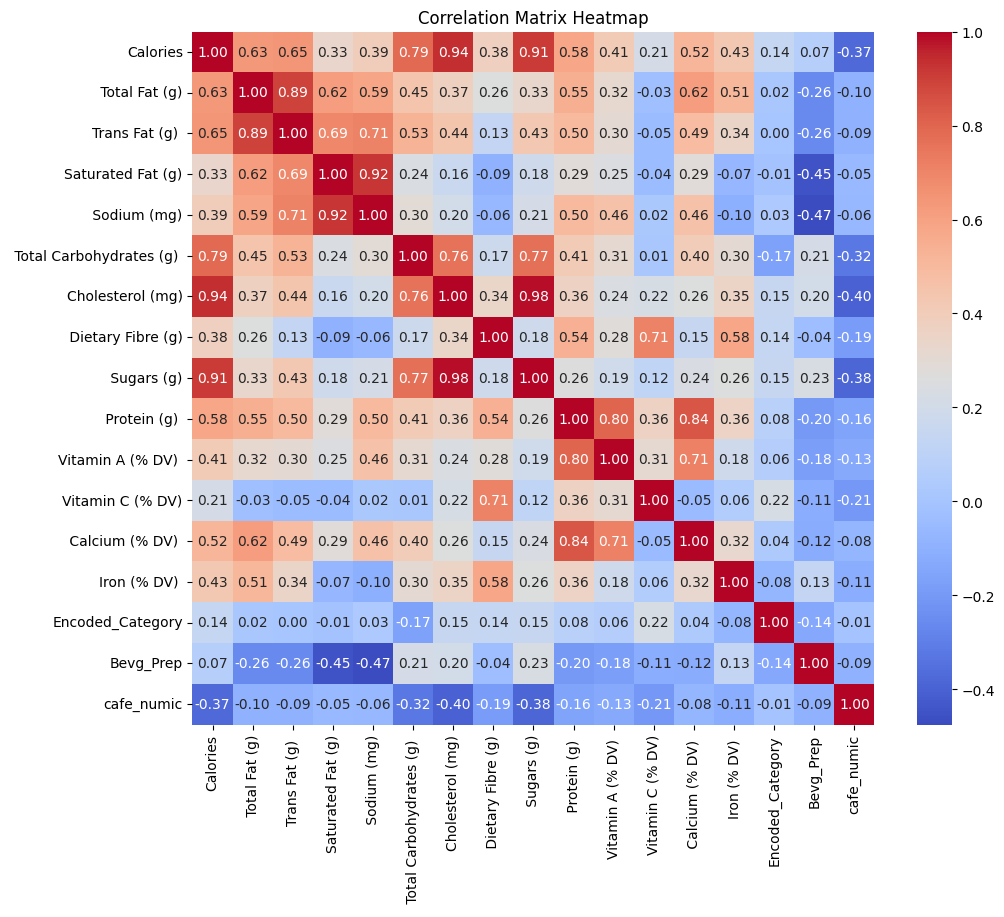

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.
# Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

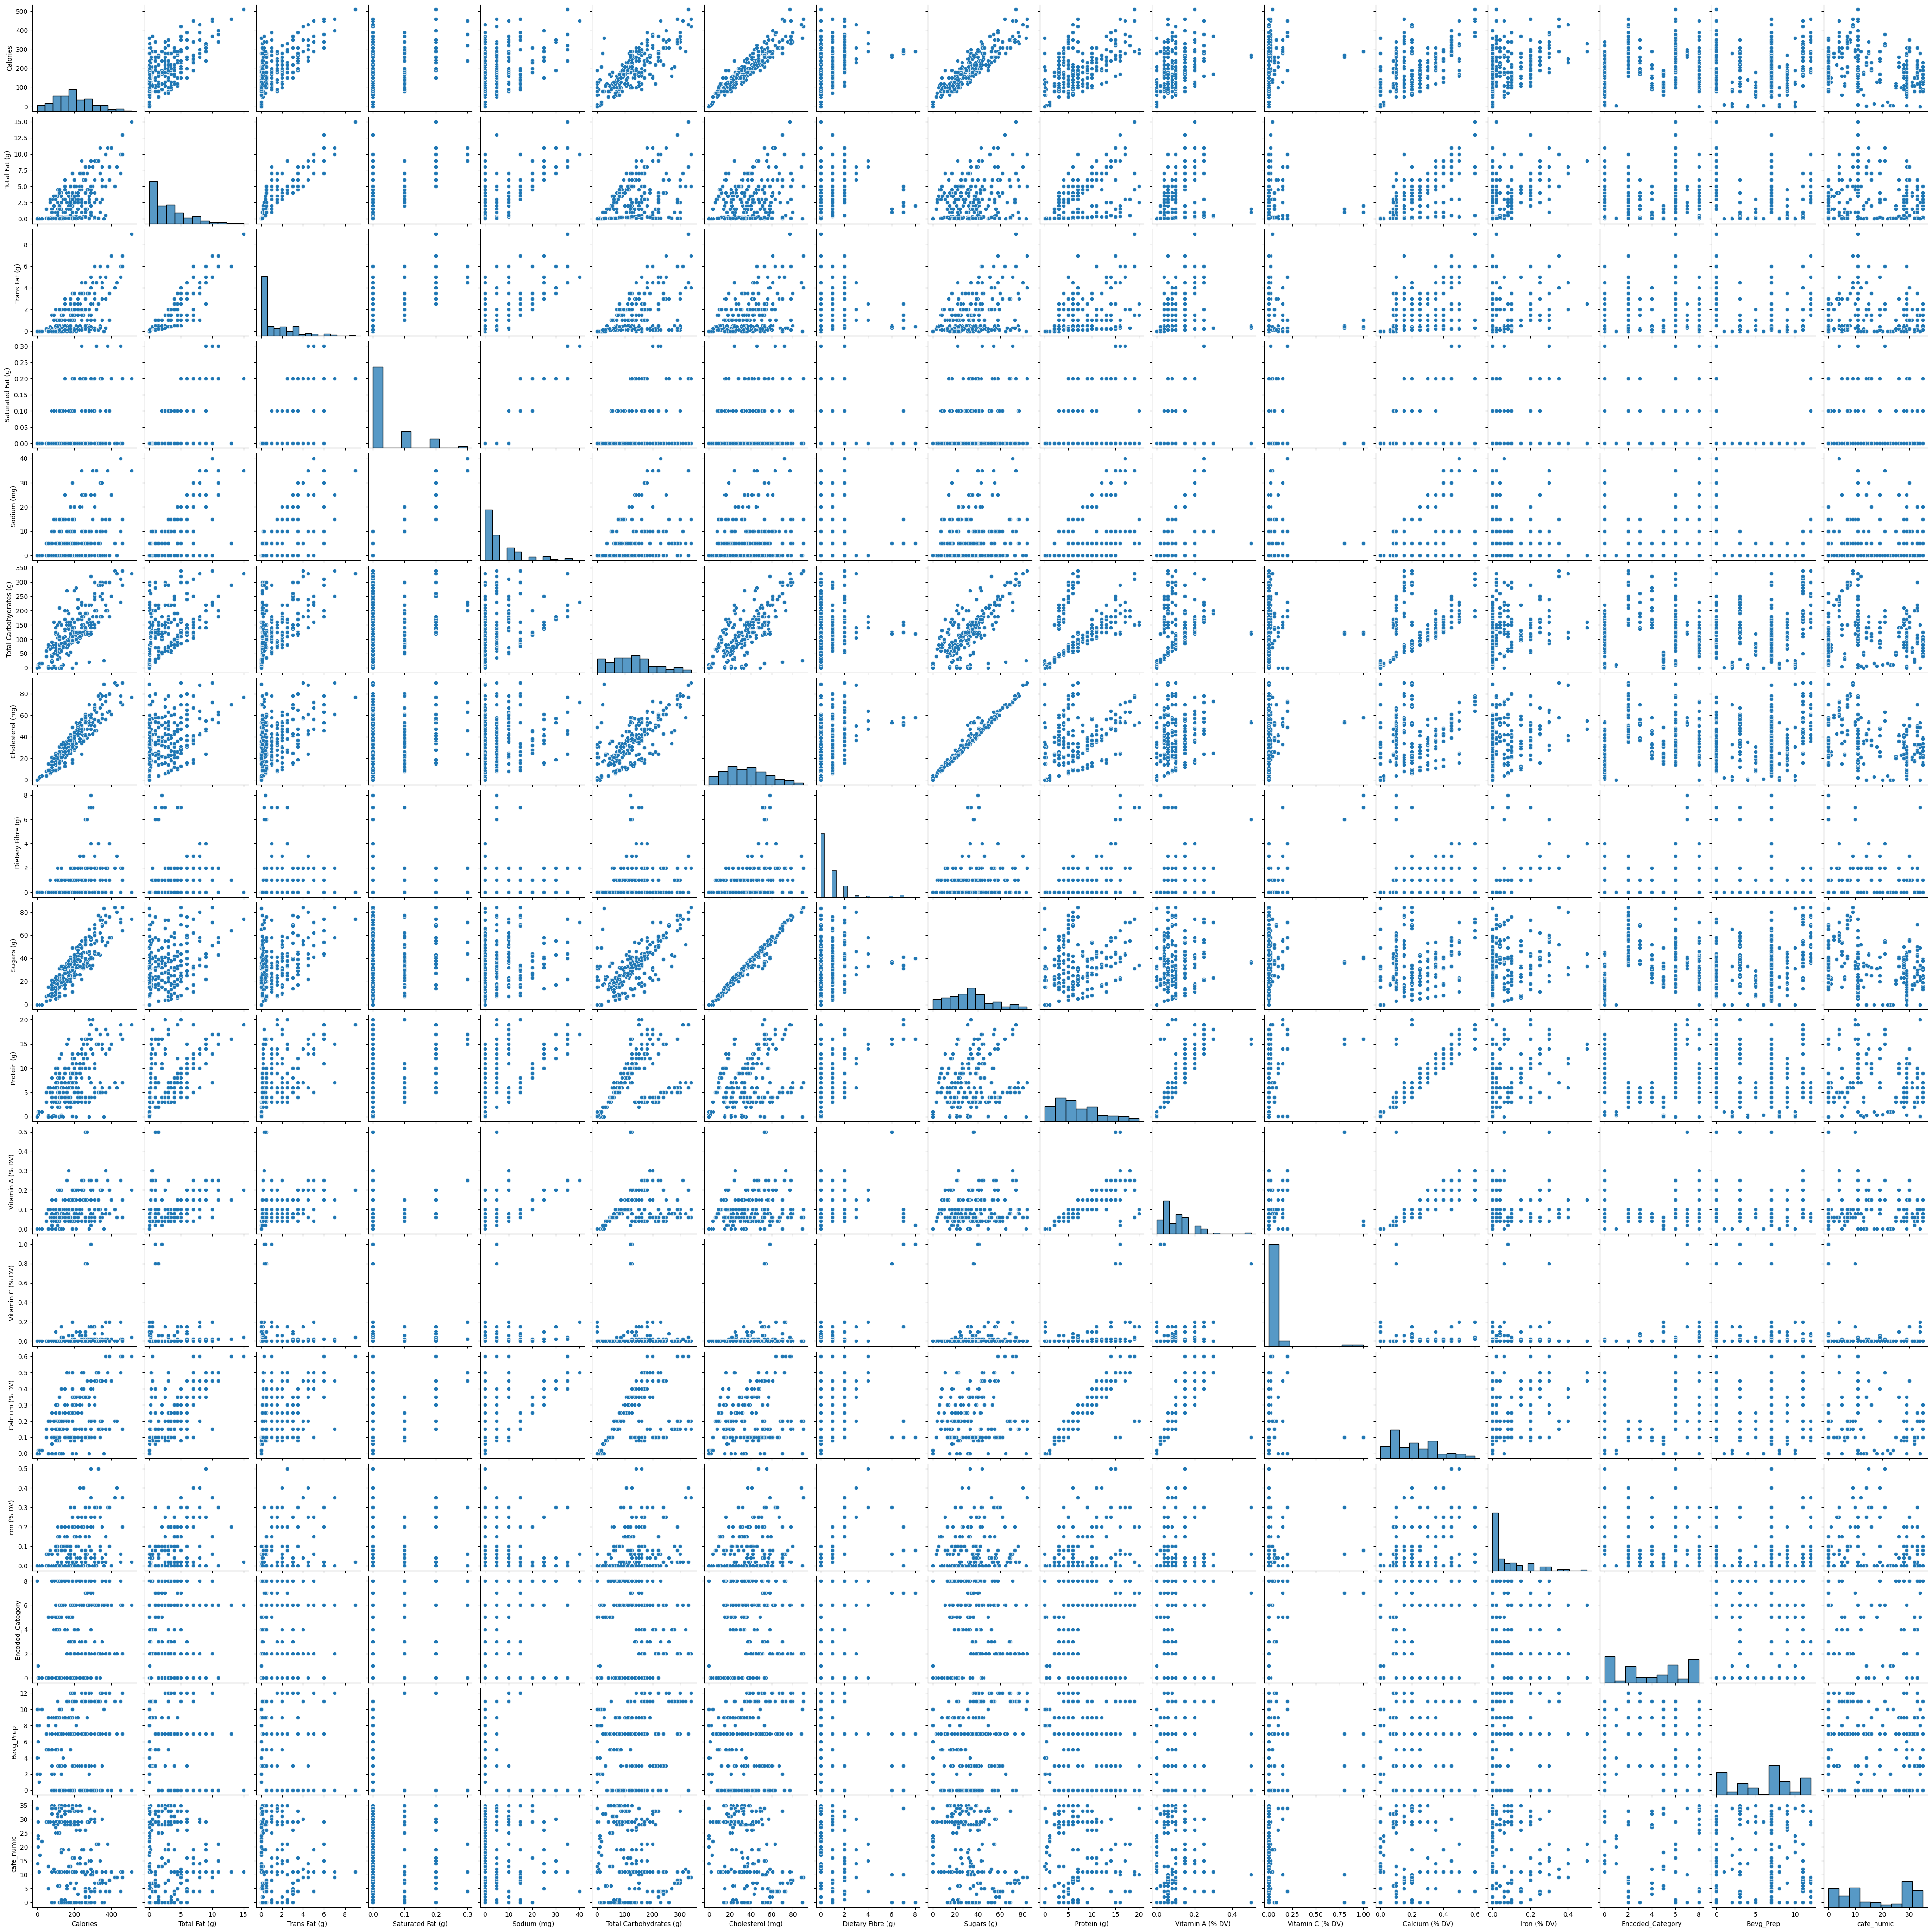

In [16]:
sns.pairplot(data)
plt.show()

# Another Model (New Model)

In [17]:
data

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Encoded_Category,Bevg_Prep,cafe_numic
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.00,0.00,0.00,0.00,1,4,14
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.00,0.00,0.00,0.00,1,8,20
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.00,0.00,1,2,23
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.02,0.00,1,10,24
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.10,0.00,0.20,0.00,0,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,350,6.0,3.0,0.2,15,260,70,0,68,6.0,0.08,0.08,0.20,0.04,3,12,0
236,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0.06,0.00,0.10,0.00,3,9,0
237,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0.06,0.00,0.10,0.00,3,12,0
238,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0.04,0.00,0.10,0.06,3,7,0


In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
df1_train, df1_test = train_test_split(data, test_size=0.3, random_state=42)


In [19]:
df1_test.shape

(72, 17)

In [20]:
X1=data.columns
print(X1)

Index(['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic'],
      dtype='object')


In [21]:
y1_numeric = ' Protein (g) '

# Assuming X1 is a list of column names
X1 = [column for column in X1 if column != y1_numeric]

print(X1)


['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic']


In [22]:
y = ' Protein (g) '
x =  'Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', 'Sodium (mg)',' Total Carbohydrates (g) ', 'Cholesterol (mg)', 'Dietary Fibre (g)', ' Sugars (g)', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ','Iron (% DV) ', 'Encoded_Category', 'Bevg_Prep', 'cafe_numic'

In [23]:
aml1 = H2OAutoML(max_runtime_secs=222, seed=1)

In [24]:
import h2o
h2o.init()

# Assuming df1_train is a pandas DataFrame
h2o_df1_train = h2o.H2OFrame(df1_train)

aml1.train(x=X1, y=y1_numeric, training_frame=h2o_df1_train)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 37 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_8oa24q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███
05:27:18.148: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 168.0.

████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20240219_52710_model_17


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    67                 67                          15897                  4            4            4             8             16            14.2687

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03623871990927866
RMSE: 0.19036470237225878
MAE: 0.1481999225382294
RMSLE: 0.04555263908571368
Mean Residual Deviance: 0.03623871990927866

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.7510284009480044
RMSE: 0.8666189479511768
MAE: 0.6129403948336899
RMSLE: 0.14277167724448736
Mean Residual Deviance: 0.7510284009480044

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.61436   0.0991198  0.47787       0.637509      0.669243      0.555802      0.731375
mean_residual_deviance  0.753028  0.255942   0.508833      0.793588      0.783425      0.535656      1.14364
mse                     0.753028  0.255942   0.508833      0.793588      0.783425      0.535656      1.14364
r2                      0.966329  0.0104307  0.981814      0.964227      0.963513      0.969019      0.953069
residual_deviance       0.753028  0.255942   0.508833      0.793588      0.783425      0.535656      1.14364
rmse                    0.858114  0.144346   0.713326      0.890836      0.885113      0.731885      1.06941
rmsle                   0.136416  0.0485006  0.141361      0.0989626     0.136421      0.0916194     0.213716

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 05:29:25  16.298 sec  0                  4.77249          3.86458         22.7766
    2024-02-19 05:29:25  16.308 sec  5                  2.93163          2.4046          8.59448
    2024-02-19 05:29:25  16.317 sec  10                 1.85605          1.50819         3.44493
    2024-02-19 05:29:25  16.327 sec  15                 1.2069           0.966021        1.4566
    2024-02-19 05:29:25  16.337 sec  20                 0.820444         0.653115        0.673129
    2024-02-19 05:29:25  16.347 sec  25                 0.58438          0.463633        0.3415
    2024-02-19 05:29:25  16.357 sec  30                 0.442881         0.353214        0.196143
    2024-02-19 05:29:25  16.370 sec  35                 0.359503         0.284844        0.129243
    2024-02-19 05:29:25  16.388 sec  40                 0.30484          0.242165        0.0929272
    2024-02-19 05:29:25  16.397 sec  45                 0.263725         0.208575        0.0695511
    2024-02-19 05:29:25  16.408 sec  50                 0.23939          0.188336        0.0573075
    2024-02-19 05:29:25  16.417 sec  55                 0.22363          0.174903        0.0500106
    2024-02-19 05:29:25  16.427 sec  60                 0.206921         0.161876        0.0428163
    2024-02-19 05:29:25  16.437 sec  65                 0.193577         0.150287        0.0374722
    2024-02-19 05:29:25  16.441 sec  67                 0.190365         0.1482          0.0362387

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Calcium (% DV)           6134.01           

In [25]:
print(aml1.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_2_20240219_52710_model_17             0.866619  0.751028  0.61294   0.142772                  0.751028
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_52710  0.885288  0.783734  0.598555  0.132251                  0.783734
GBM_grid_1_AutoML_2_20240219_52710_model_13             0.889968  0.792043  0.595942  0.126809                  0.792043
GBM_grid_1_AutoML_2_20240219_52710_model_47             0.923048  0.852017  0.587786  0.125094                  0.852017
GBM_5_AutoML_2_20240219_52710                           0.955702  0.913366  0.611423  0.12526                   0.913366
StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_52710  0.970707  0.942272  0.610477  0.123406                  0.942272
GBM_grid_1_AutoML_2_20240219_52710_model_46             1.0275    1.05575   0.662083  0.155519                  1.05575
GBM_grid_1_AutoML_2_20240219_5271

In [26]:
# Assuming 'aml1' is your H2OAutoML instance
leaderboard_df = aml1.leaderboard.as_data_frame()

# Print the index along with the model_id
for index, row in leaderboard_df.iterrows():
    print(f"Index: {index}, Model ID: {row['model_id']}")


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Index: 0, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_17
Index: 1, Model ID: StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_52710
Index: 2, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_13
Index: 3, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_47
Index: 4, Model ID: GBM_5_AutoML_2_20240219_52710
Index: 5, Model ID: StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_52710
Index: 6, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_46
Index: 7, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_58
Index: 8, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_21
Index: 9, Model ID: StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_52710
Index: 10, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_42
Index: 11, Model ID: GBM_grid_1_AutoML_2_20240219_52710_model_2
Index: 12, Model ID: StackedEnsemble_AllModels_1_AutoML_2_20240219_52710
Index: 13, Model ID: GBM_grid_1_AutoML_2_202

In [27]:
# Assuming 'aml1' is your H2OAutoML instance
leaderboard_df = aml1.leaderboard.as_data_frame()

# The best model is the first model in the leaderboard
best_model_id = leaderboard_df.iloc[0]['model_id']
best_model_index = 0

print(f"The best model ID is {best_model_id} with an index of {best_model_index}.")


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
The best model ID is GBM_grid_1_AutoML_2_20240219_52710_model_17 with an index of 0.


In [28]:
!pip install polars pyarrow

In [29]:
best_model_id = aml1.leaderboard[0, 'model_id']
best_model = h2o.get_model(best_model_id)

In [30]:
print(best_model_id)

GBM_grid_1_AutoML_2_20240219_52710_model_17


In [31]:
best_model = h2o.get_model(best_model_id)

# Now you can access the .algo attribute from the best_model object
algorithm_used = best_model.algo

print(algorithm_used)


gbm


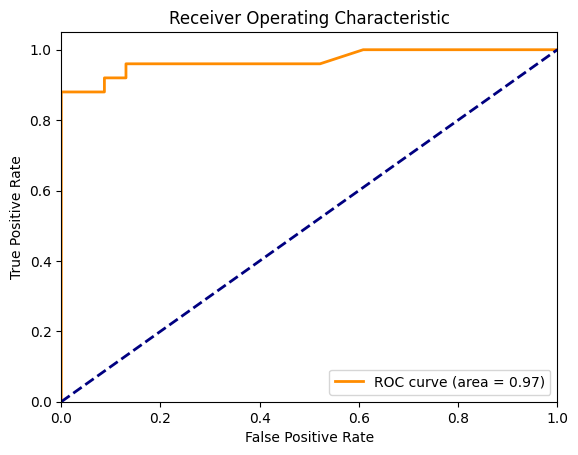

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Protein (g)' has been converted to a binary target
# Example binary conversion (adjust the threshold as needed)
protein_threshold = df[' Protein (g) '].median()  # This is just an example threshold
df['Protein_high_low'] = (df[' Protein (g) '] > protein_threshold).astype(int)

# Selecting features for the model (excluding target variables)
X = df.drop([' Protein (g) ', 'Protein_high_low'], axis=1)
y = df['Protein_high_low']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# The orange line represents the ROC curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
# The area under the ROC curve is annotated on the plot and is 0.97. This AUC (Area Under the Curve) value is a measure of the model's ability to distinguish between the two classes. A value of 1 represents perfect accuracy, while a value of 0.5 represents a model with no discriminative ability, equivalent to random guessing.

# Interpretation - With an AUC of 0.97, your model exhibits excellent discriminative ability. It means that there is a 97% chance that the model will be able to distinguish between the positive class and the negative class

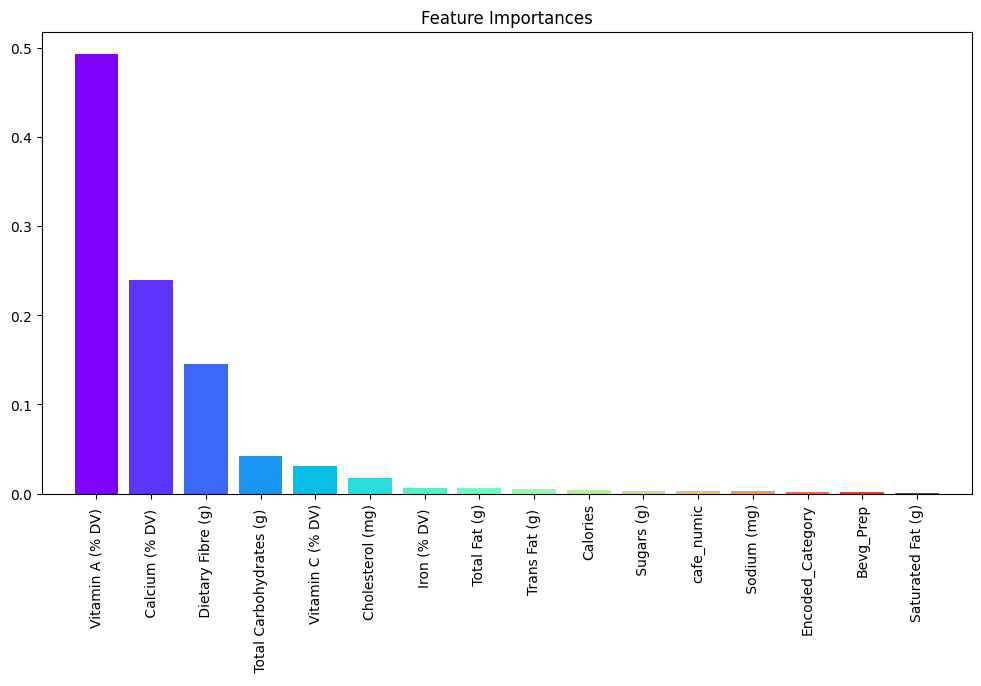

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
# Assuming the dataset path is correctly set in your local system
df = pd.read_csv('test.csv')

# Define your features and target variable
X = df.drop(' Protein (g) ', axis=1)  # replace with actual feature column names
y = df[' Protein (g) ']  # replace with actual target column name

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Generate a color palette with a distinct color for each feature
colors = plt.cm.rainbow(np.linspace(0, 1, len(indices)))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color=colors, align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# From the above results, we observe that 'Vitamin A (% DV)' ,'Calcium (% DV)', 'Dietary Fibre (g)' are some of the important features.

Mean of Residuals: -3.0866513049213986e-15


<ipython-input-34-8a9adc0d483a>:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


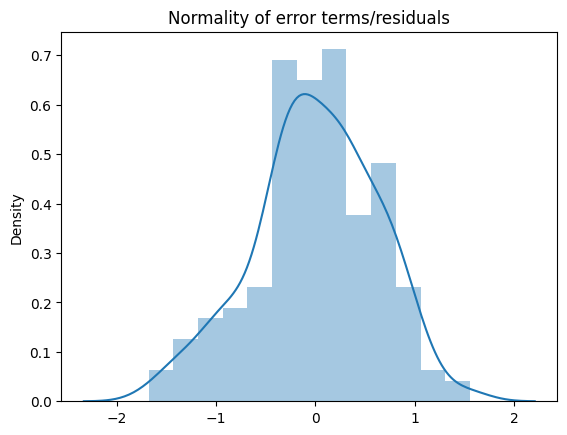

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('test.csv')  # Replace with the path to your dataset

# Define your features and target variable
X = df.drop(' Protein (g) ', axis=1)  # Replace 'Protein (g)' with the actual target column name if different
y = df[' Protein (g) ']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'cols' are the column names for the features used in the model
cols = X_train.columns

# Building the OLS model
X_train_with_constant = sm.add_constant(X_train[cols])
model = sm.OLS(y_train, X_train_with_constant).fit()

# Making predictions
y_pred = model.predict(X_train_with_constant)

# Calculating residuals
residuals = y_train - y_pred
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals}")

# Plotting the distribution of residuals to check for normality
sns.distplot(residuals, kde=True)
plt.title('Normality of error terms/residuals')
plt.show()


# The mean of the residuals being 5.8691477603881976e-15 is effectively zero, which is what you would expect in a well-fitting ordinary least squares (OLS) regression model. Residuals are the differences between the observed values and the values predicted by the model

# The mean of residuals being close to zero is a good sign, it suggests that there is no bias in the predictions, meaning the model, on average, is not systematically overestimating or underestimating the target variable.

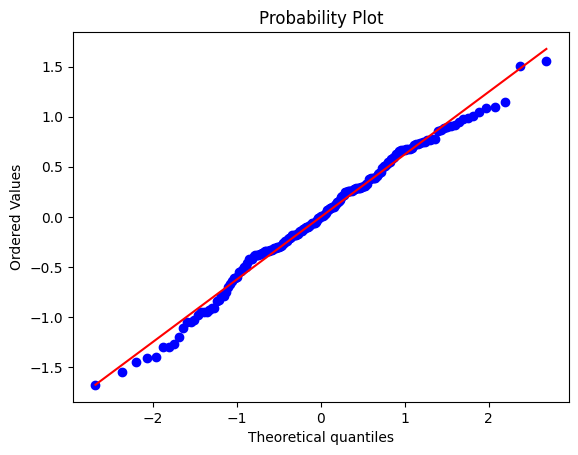

In [35]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

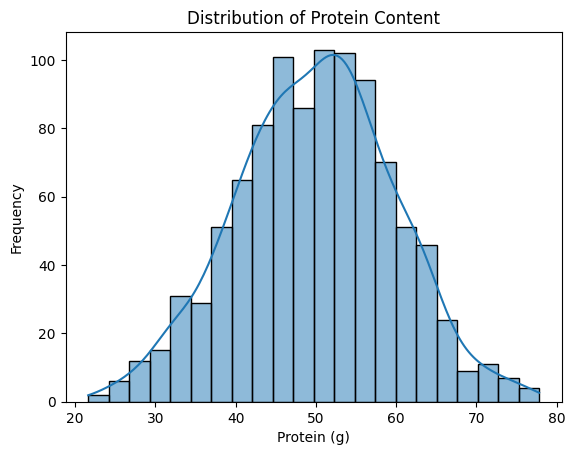

In [36]:
df = pd.DataFrame({
    'Protein (g)': np.random.normal(loc=50, scale=10, size=1000)  # Normally distributed data
})

# Plotting the distribution of 'Protein (g)' with a kernel density estimate (KDE)
sns.histplot(df['Protein (g)'], kde=True)
plt.title('Distribution of Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.show()

# Ideally for the scatterplot the result should be scattered and it should not have any particular pattern. When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.

# Ridge Regularization in H2o

In [37]:
# 1.) With Regularization

In [38]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Step 1 & 2: Initialize H2O
h2o.init()

# Step 3: Import Data
df_h2o = h2o.import_file('test.csv')  # Replace with your dataset's path

# Step 4: Prepare Data (assuming 'Protein (g)' is the column you want to predict)
# Convert target column to factor if it's categorical for classification
# df_h2o['Protein (g)'] = df_h2o['Protein (g)'].asnumeric()  # If your target variable is numeric, ensure it's the right type

# Split the data into train and validation sets
train, valid = df_h2o.split_frame(ratios=[.8], seed=1234)

# Define predictors and response
# predictors = train.columns
# response = ' Protein (g) '
# predictors.remove(response)

# Define predictors and response
response = 'Protein (g) '  # Make sure there are no leading/trailing spaces
predictors = [col for col in train.columns if col != response]

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 mins 34 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_8oa24q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.135 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [39]:
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [40]:
house_glm_regularization.train(x = predictors, y = response, training_frame = df_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708320206353_37


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  16                            16                             1                       test3.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4106017050768157
RMSE: 0.6407821042107962
MAE: 0.5029154859175863
RMSLE: 0.15513471411320856
Mean Residual Deviance: 0.4106017050768157
R^2: 0.9826834558701647
Null degrees of freedom: 239
Residual degrees of freedom: 223
Null deviance: 5690.766499341529
Residual deviance: 98.54440921843577
AIC: 503.45890671607583

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2024-02-19 05:31:08  0.000 sec   0             5690.766500000004          23.71152708333335
    2024-02-19 05:31:08  0.021 sec   1                                                           0.6407821042107962  0.4106017050768157   0.5029154859175863  0.9826834558701647

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Sugars (g)               6.05982                1                    0.257933
Cholesterol (mg)         3.51818                0.580575             0.149749
Calories                 3.26603                0.538965             0.139017
Calcium (% DV)           3.14234                0.518553             0.133752
Total Fat (g)            2.67649                0.441678             0.113923
Trans Fat (g)            1.52169                0.251111             0.0647698
Dietary Fibre (g)        1.50599                0.248521             0.0641018
Sodium (mg)              0.685151               0.113064             0.0291631
Iron (% DV)              0.413274               0.068199             0.0175908
Vitamin A (% DV)         0.351328               0.0579766            0.0149541
Saturated Fat (g)        0.118265               0.0195162            0.00503388
Total Carbohydrates (g)  0.117818               0.0194424            0.00501485
Bevg_Prep                0.0440365              0.00726696           0.00187439
Vitamin C (% DV)         0.0378664              0.00624876           0.00161176
cafe_numic               0.0200672              0.00331151           0.000854149
Encoded_Category         0.0154344              0.00254701           0.000656958

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# 2.) Without Regularization

In [41]:
house_glm.train(x = predictors, y = response, training_frame = df_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708320206353_38


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              16                            16                             1                       test3.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.3823441019476529
RMSE: 0.6183397948924627
MAE: 0.48945858033888895
RMSLE: 0.19835559093869606
Mean Residual Deviance: 0.3823441019476529
R^2: 0.9838751801751039
Null degrees of freedom: 239
Residual degrees of freedom: 223
Null deviance: 5690.766499341529
Residual deviance: 91.7625844674367
AIC: 486.34626744106424

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -------------------  ------------------
    2024-02-19 05:31:08  0.000 sec   0             5690.766500000004          23.71152708333335
    2024-02-19 05:31:08  0.027 sec   1                                                           0.6183397948924627  0.3823441019476529   0.48945858033888895  0.9838751801751039

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Sugars (g)               8.9823                 1                    0.30877
Cholesterol (mg)         6.2055                 0.690859             0.213316
Calories                 3.65633                0.407059             0.125688
Calcium (% DV)           3.19694                0.355916             0.109896
Total Fat (g)            2.92127                0.325225             0.10042
Trans Fat (g)            1.51707                0.168896             0.0521499
Dietary Fibre (g)        0.978762               0.108966             0.0336453
Sodium (mg)              0.486596               0.0541728            0.0167269
Iron (% DV)              0.373135               0.0415412            0.0128267
Vitamin A (% DV)         0.250457               0.0278834            0.00860954
Total Carbohydrates (g)  0.224379               0.0249801            0.00771311
Saturated Fat (g)        0.122416               0.0136285            0.00420808
Encoded_Category         0.0632132              0.00703753           0.00217298
cafe_numic               0.046601               0.00518809           0.00160193
Bevg_Prep                0.0429488              0.00478149           0.00147638
Vitamin C (% DV)         0.022702               0.00252741           0.000780388

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Inference -

# Top Predictors Consistency: In both scenarios, Sugars (g) is the most important predictor variable, followed by Cholesterol (mg) and Calories. This consistency indicates that regardless of regularization, these variables have a strong influence on the target variable

# Scaled Importance Changes: The scaled importances have decreased for all features under regularization. Notably, for Sugars (g), the scaled importance has decreased from 1.0 to around 0.58 with regularization, reflecting a decrease in this variable's dominance in the model with regularization applied.

# Percentage Distribution:  The distribution of importance percentages among the features has changed with regularization. For example, Sugars (g) accounts for a greater percentage of the overall importance in the regularized model (25.79%) compared to the non-regularized model (30.87%). This reduction suggests that regularization is balancing the influence of the features, making the model less dependent on a single or a few features.

# Model Interpretability and Robustness: The regularization process likely improved the model's robustness and interpretability by reducing the risk of overfitting and ensuring that no single variable would disproportionately affect the model's predictions.

In [42]:
import polars as pl
import pyarrow as pa


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_52710,0.740938,0.54899,0.510724,0.0914709,0.54899,115,0.187573,StackedEnsemble
GBM_grid_1_AutoML_2_20240219_52710_model_17,0.764872,0.58503,0.51906,0.107095,0.58503,146,0.037647,GBM
StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_52710,0.813587,0.661924,0.557513,0.109447,0.661924,117,0.131919,StackedEnsemble
GBM_grid_1_AutoML_2_20240219_52710_model_46,0.841416,0.707981,0.591035,0.111555,0.707981,126,0.053628,GBM
XGBoost_grid_1_AutoML_2_20240219_52710_model_8,0.847575,0.718384,0.581557,0.0977633,0.718384,261,0.018611,XGBoost
XGBoost_grid_1_AutoML_2_20240219_52710_model_13,0.853874,0.729101,0.584249,0.11537,0.729101,223,0.01555,XGBoost
GBM_grid_1_AutoML_2_20240219_52710_model_42,0.854594,0.730331,0.571524,0.110423,0.730331,178,0.066825,GBM
GBM_grid_1_AutoML_2_20240219_52710_model_47,0.857868,0.735938,0.633926,0.101288,0.735938,427,0.046281,GBM
GBM_grid_1_AutoML_2_20240219_52710_model_13,0.864641,0.747605,0.612974,0.110781,0.747605,323,0.069194,GBM
XGBoost_3_AutoML_2_20240219_52710,0.873629,0.763228,0.664137,0.136666,0.763228,261,0.012267,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

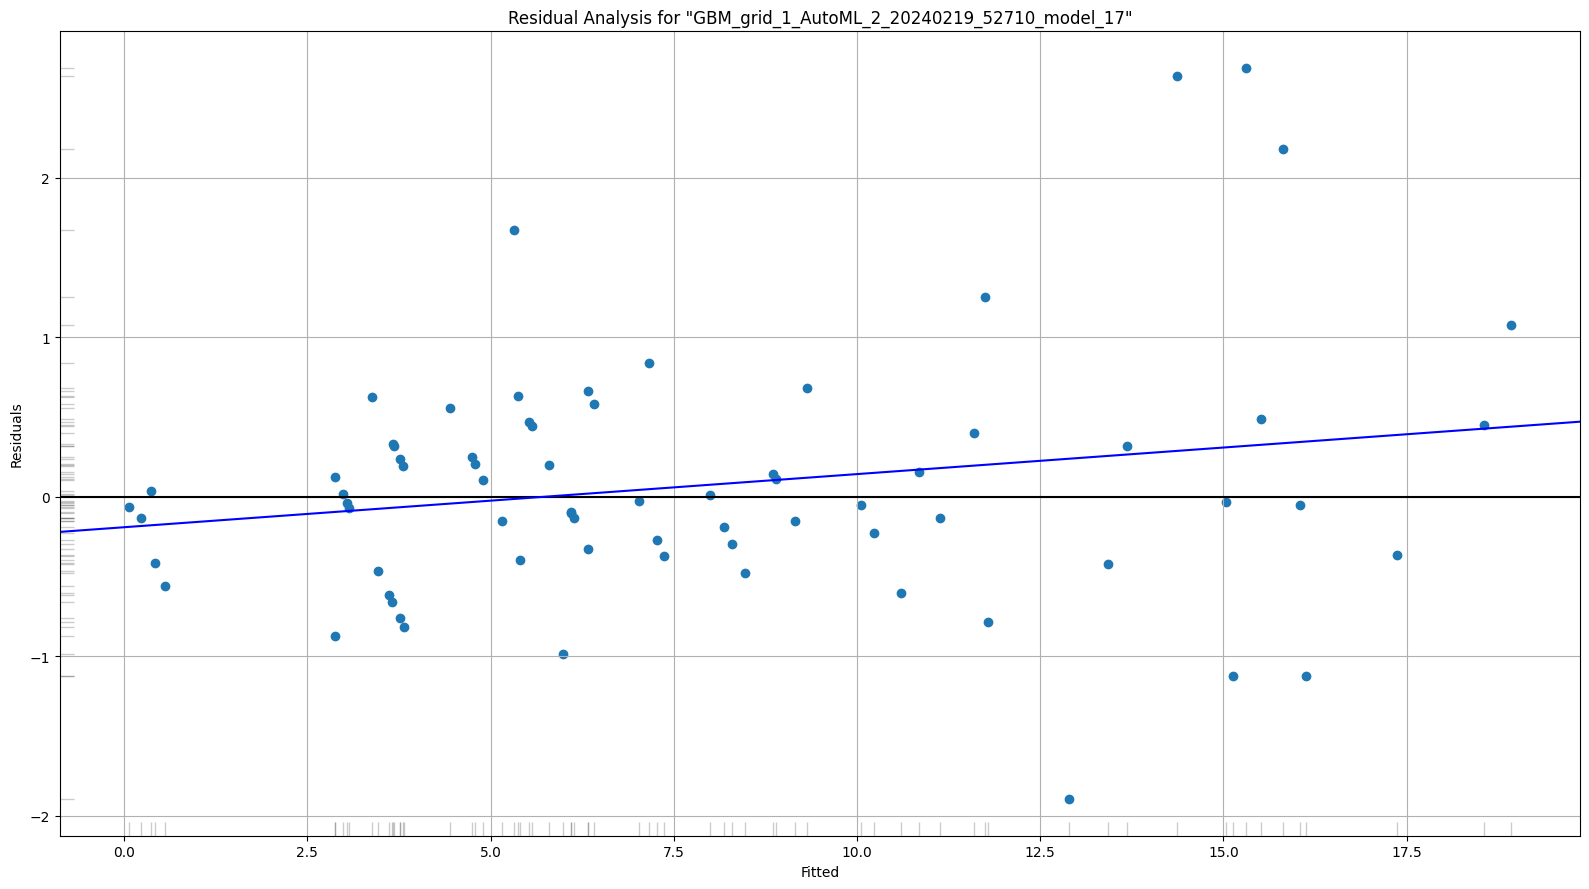

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

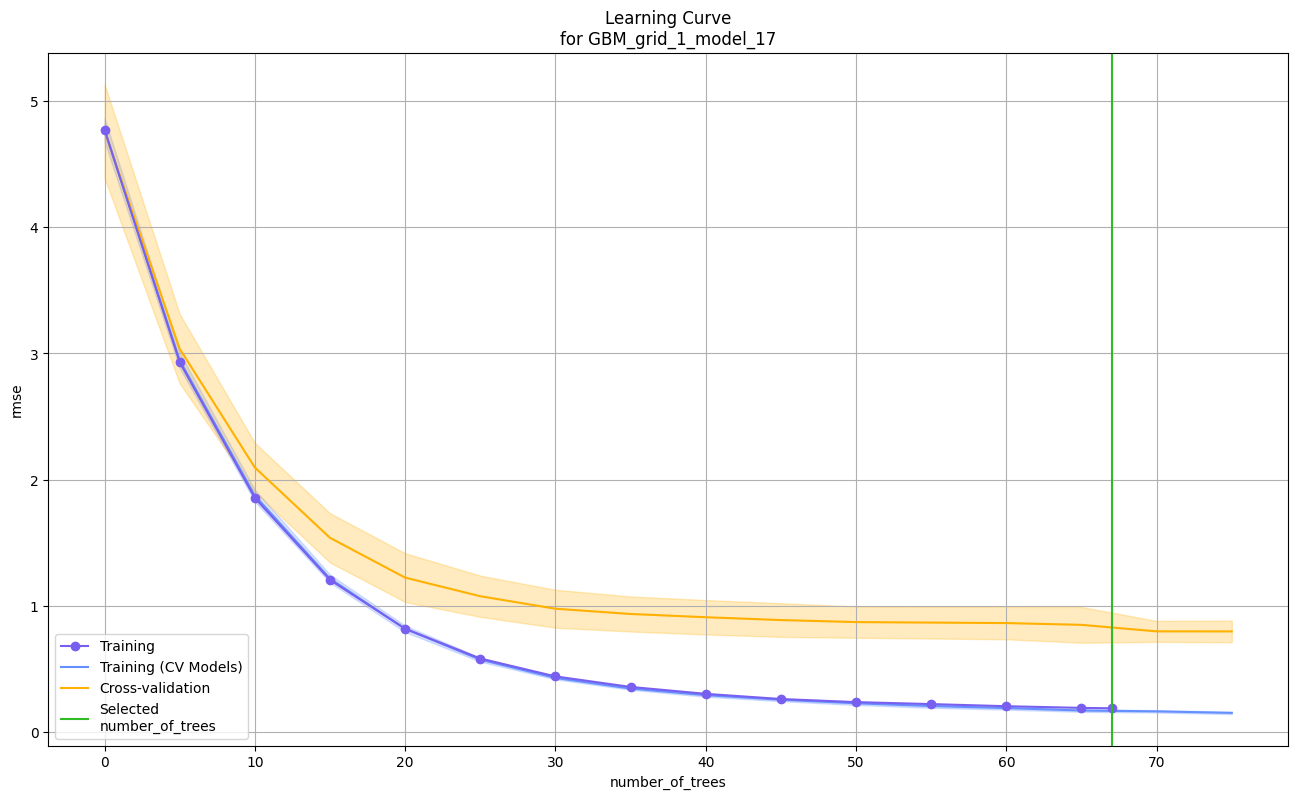

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

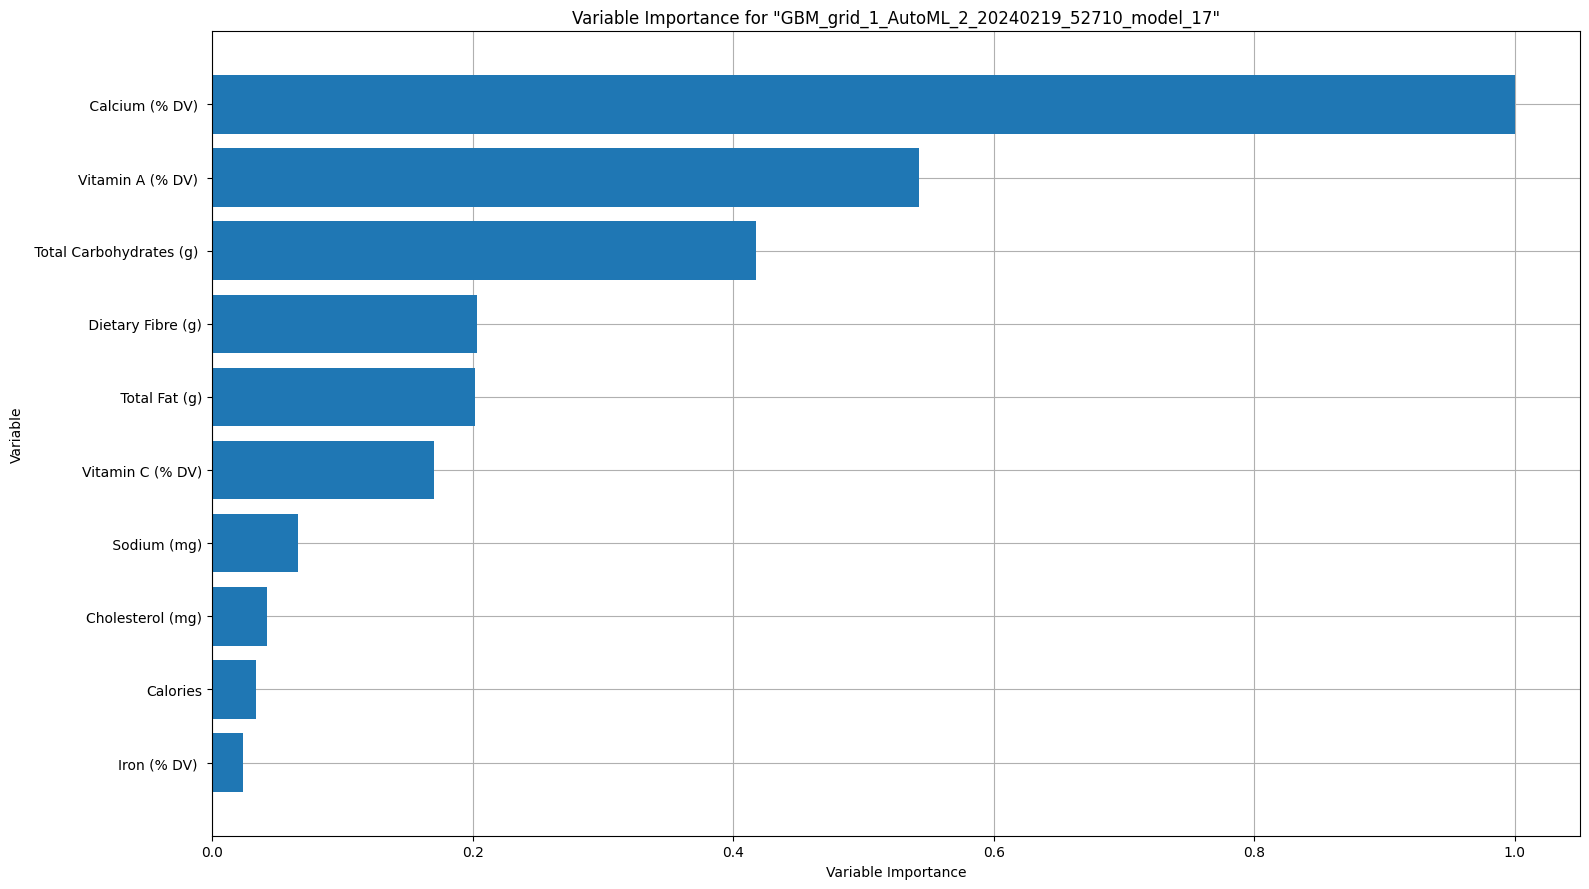

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

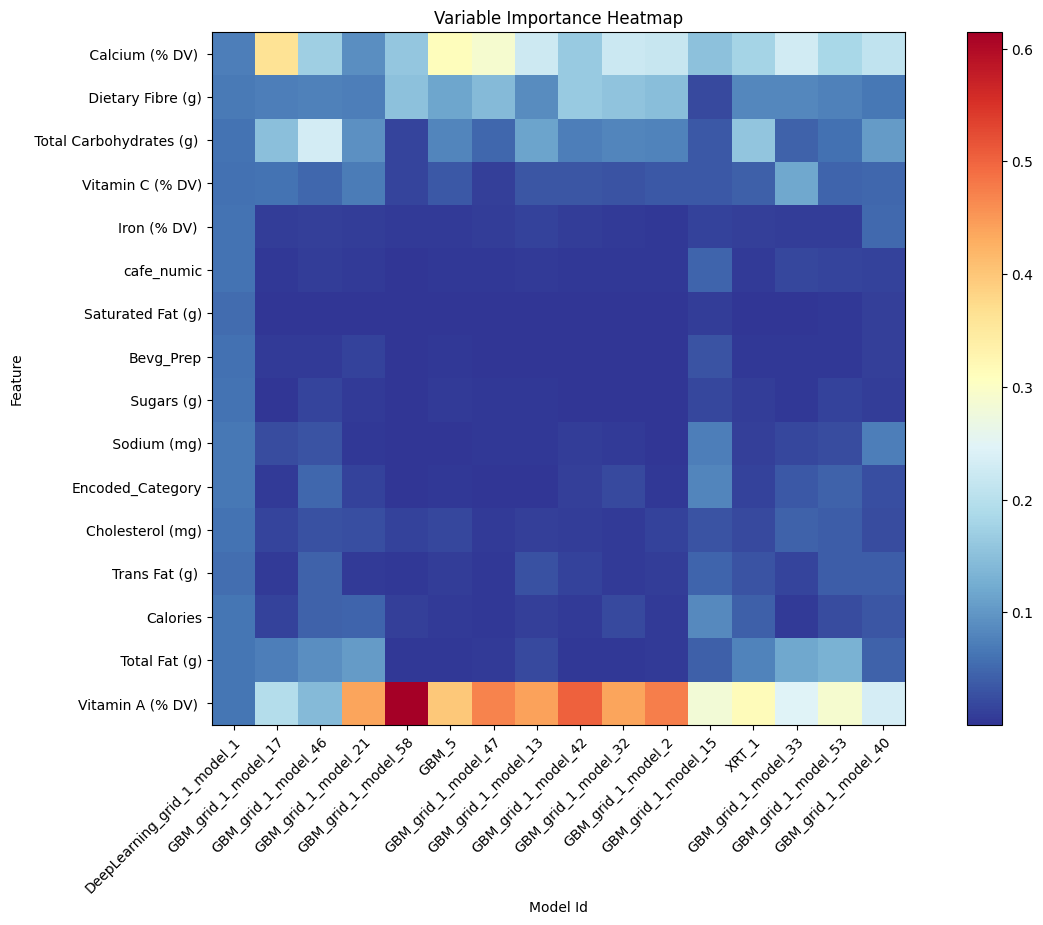

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

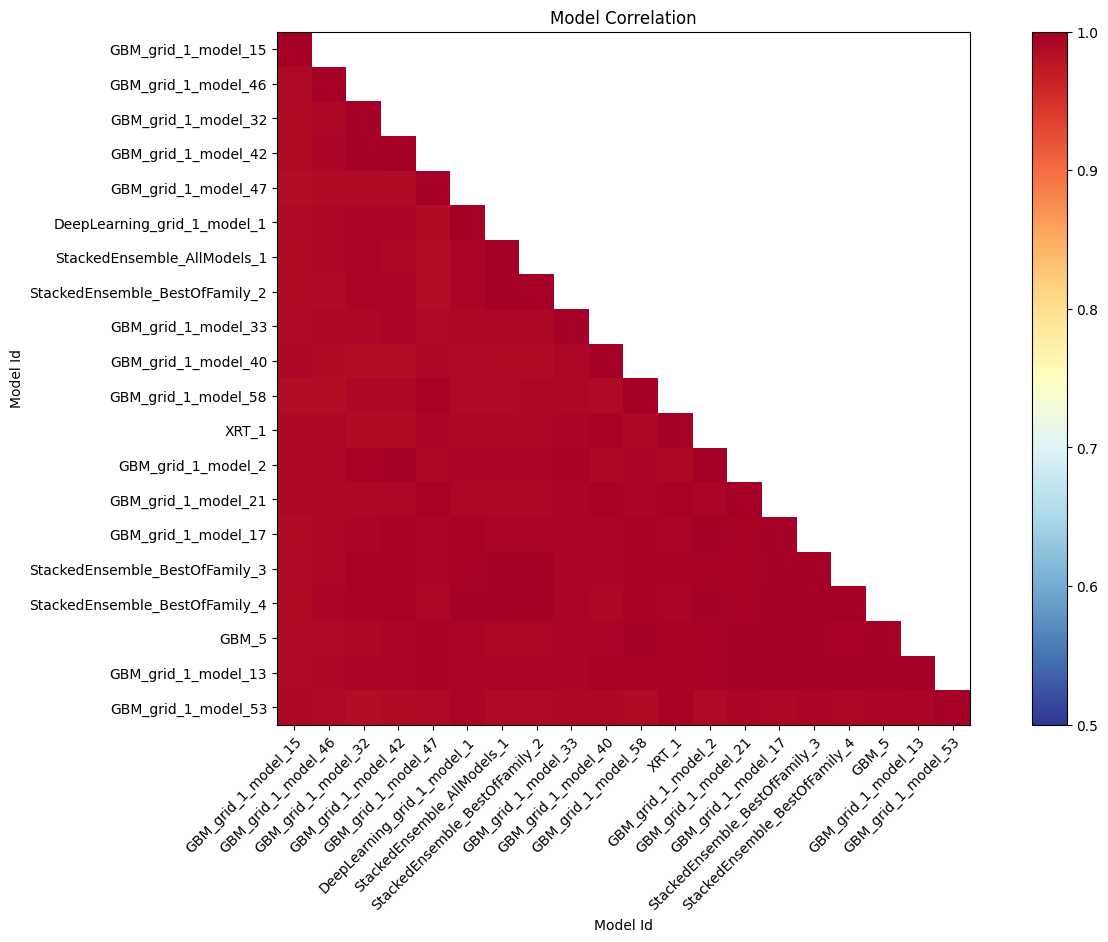

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

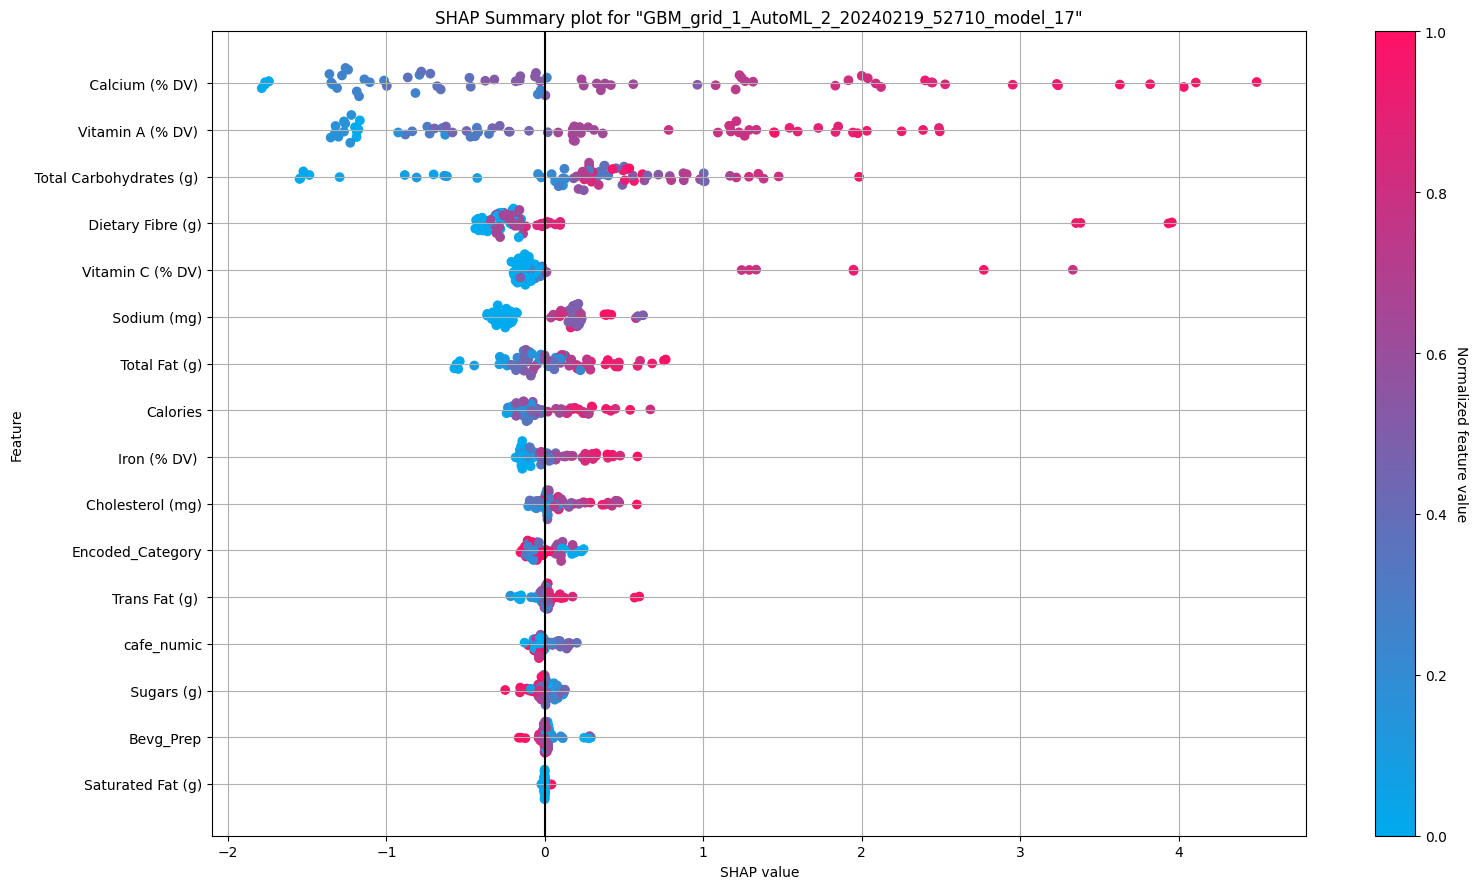

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OServerError: HTTP 500 Server Error:
Server error java.lang.NullPointerException:
  Error: Caught exception: java.lang.NullPointerException
  Request: None
  Stacktrace: java.lang.NullPointerException
      hex.PartialDependence.checkSanityAndFillParams(PartialDependence.java:181)
      hex.PartialDependence.execImpl(PartialDependence.java:58)
      water.api.ModelsHandler.makePartialDependence(ModelsHandler.java:174)
      java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
      java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
      java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
      java.base/java.lang.reflect.Method.invoke(Method.java:566)
      water.api.Handler.handle(Handler.java:60)
      water.api.RequestServer.serve(RequestServer.java:472)


<Figure size 1600x900 with 0 Axes>

In [49]:
# Assuming you have already initialized H2O
import h2o

# Convert the pandas DataFrame `df1_test` to an H2OFrame
h2o_df1_test = h2o.H2OFrame(df1_test)

# Now you can call the explain function
exa = aml1.explain(h2o_df1_test)


# Hyperparameter tuning

In [44]:
s = data[' Protein (g) ']

t = data.drop([' Protein (g) '], axis = 1)

In [45]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [46]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [47]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [50]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 500}

# Conclusion

# A fundamental algorithm based on the linear regression method to predict protein content was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset. This gave the best model as ‘deeplearning’. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the importance of protein to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.There are still some improvements that are needed to be done in H2o.ai library , for some visualizations it cannot connect to the server and throws java lang error.

# Assignment Question and Answers

1) Is the relationship significant - A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Saturated Fat (g)’ and ‘Vitamin C (% DV)’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.


2) Are any model assumptions violated -
==>  Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

==> Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

==> No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is741.6, therefore this assumption is not violat

3) Is there any multicollinearity in the mode When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05.Currently high correlation exists between Sugar and Cholestrol.

4) In the multivariate models are predictor variables independent of all the other predictor variable Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Sugar and Cholestrol are correlated to each other. Other than those other predictors are independent from each other.

5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the mode From the variable importance plot, the most to least important variables are displayed. For my model Vitamnin(A), Calcium, Total Carbohydrate , Vitamin C are top 4 most important variables to determine Price. VIF and p-values for ‘Saturated Fat (g)’ and ‘Vitamin C (% DV)’ was high than the ideal values. So those variables were excluded from the model.

6) Does the model make sens For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.98 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.
   
7) Does regularization hel Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

8) Which independent variables are significan Variables are significant when p-value is less than 0.05. For this model except for Saturated Fat (g), Vitamin C (% DV), cafe_numic , Encoded_Category   all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

9) Which hyperparameters are importaTo find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 1100nt -

# MIT LICENSE


MIT License

Copyright (c) 2024 pranav1414

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# References


H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Dataset - https://www.kaggle.com/datasets/henryshan/starbucks/data

Prof AutoMl notebook -  https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML

Prof Starter notebook - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks

# DONE